Loading the dataset into google colab

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

import logging
logging.getLogger("kagglehub").setLevel(logging.CRITICAL)


The link to access the csv file used in this project is below. The csv file is named  'USA Housing dataset.csv' \\
https://drive.google.com/drive/folders/1og4m86Hq896F3Erm7BelHKo6vN0PAnXZ?usp=drive_link

# Part 1 - Understanding the data

House Price Dataset



*   When was the data acquired?



The data was gathered over the period of time between 9 May 2014 to 10 July 2014. The data was uploaded to Kaggle and the most recent update was 7 months ago, around July 2024. For the purposes of this analysis, the data was accessed on Kaggle.com on February 12, 2025.





*   Where was the data acquired?



The team that performed the analysis in this report accessed the data used in the report via Kaggle.com. The data in Kaggle was collected from various cities in the state of Washington in United States of America (USA) and it describes the economic and social factors affecting property pricing.



*   How was the data acquired?



The data tells us information about property prices and relating factors in various cities of Washington, USA. The data was sourced from Kaggle for this project but there is no information in Kaggle as to how the data was originally collected. \\
Somepotential sources could be :-

1. Property tax assessments and historical sales data, real estate transactions and ownership records, Zillow Research Data are some public records which can be accessed. HUD (U.S. Department of Housing and Urban Development) is a government database and also has information about housing and property transaction data. \\
2. Real estate agencies list properties on Multiple Listing Services (MLS), and some aggregate data is available through third-party providers. \\
3. Zillow, Redfin, Realtor.com, Trulia have aggregated listing data from various sources, including MLS, user submissions, and public records. \\
4. Private Data Providers like Black Knight, CoreLogic, and RealtyTrac collect and sell detailed real estate market insights.
5. Universities and research institutions may publish housing market studies using a combination of public records and private datasets.



*   What are the attributes of the dataset?



**The variables and their descriptions are as follows -**

1.   **Date** - The date when the property was sold. This feature helps in understanding the temporal trends in property prices.

2.   **Price** - The sale price of the property in USD. This is the target variable we aim to predict.

3. **Bedrooms** - The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.

4. **Bathrooms** - The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.

5. **Sqft Living** - The size of the living area in square feet. Larger living areas are typically associated with higher property values.

6. **Sqft Lot** - The size of the lot in square feet. Larger lots may increase a property’s desirability and value.

7. **Floors** - The number of floors in the property. Properties with multiple floors may offer more living space and appeal.

8. **Waterfront** - A binary indicator (1 if the property has a waterfront view, 0 otherwise). Properties with waterfront views are often valued higher.

9. **View** - An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.

10. **Condition** - An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.

11. **Sqft Above** - The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.

12. **Sqft Basement** - The square footage of the basement. Basements may add value depending on their usability.

13. **Yr Built** - The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.

14. **Yr Renovated** - The year the property was last renovated. Recent renovations can increase a property’s appeal and value.

15. **Street** - The street address of the property. This feature can be used to analyze location-specific price trends.

16. **City** - The city where the property is located. Different cities have distinct market dynamics.

17. **Statezip** - The state and zip code of the property. This feature provides regional context for the property.

18. **Country** - The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.



The code below gives us a comprehensive table describing the variables in the dataset and their respective descriptions.

In [4]:
import pandas as pd

# Define the variables and their descriptions
data = {
    'Variable': ['Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft living', 'Sqft lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Sqft above', 'Sqft basement', 'Yr built', 'Yr renovated', 'Zipcode', 'Street', 'City', 'Statezip', 'Country'],
    'Description': [
        'The date when the property was sold.',
        'The sale price of the property in USD. This is the target value we aim to predict',
        'The number of bedrooms in the property.Generally properties with more bedrooms tend to have higher prices',
        'The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.',
        'The size of the living area in square feet. Larger living areas are typically associated with higher property values.',
        'The size of the lot in square feet. Larger lots may increase a property’s desirability and value',
        'The number of floors in the property.Properties with multiple floors may offer more living space and appeal.',
        'A binary indicator (1 if the property has a waterfront view, 0 otherwise). Properties with waterfront views are often valued higher.',
        'An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.',
        'An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.',
        'The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.',
        'The square footage of the basement. Basements may add value depending on their usability.',
        'The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.',
        'The year the property was last renovated. Recent renovations can increase a property’s appeal and value.',
        'The ZIP code in which the property is located.',
        'The street address of the property. This feature can be used to analyze location-specific price trends.',
        'The city where the property is located. Different cities have distinct market dynamics.',
        'The state and zip code of the property. This feature provides regional context for the property.',
        'The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.'
    ]
}

# Create a DataFrame
df1 = pd.DataFrame(data)



# Apply styling for a formatted table
styled_df1 = df1.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '2px solid black',
    'color': 'black',
    'text-align': 'left'  # Ensures table content is left-aligned
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Ensures content stays left-aligned
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 1 - Property Data Variables and Descriptions")

styled_df1


,Variable,Description
0,Date,The date when the property was sold.
1,Price,The sale price of the property in USD. This is the target value we aim to predict
2,Bedrooms,The number of bedrooms in the property.Generally properties with more bedrooms tend to have higher prices
3,Bathrooms,"The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value."
4,Sqft living,The size of the living area in square feet. Larger living areas are typically associated with higher property values.
5,Sqft lot,The size of the lot in square feet. Larger lots may increase a property’s desirability and value
6,Floors,The number of floors in the property.Properties with multiple floors may offer more living space and appeal.
7,Waterfront,"A binary indicator (1 if the property has a waterfront view, 0 otherwise). Properties with waterfront views are often valued higher."
8,View,An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.
9,Condition,An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.




* What type of data do these attributes contain?



**This how I have distributed each variable to different data type using the below definition -**
1. Nominal: Categories with no meaningful order (e.g., ZIP codes, country).

2. Ordinal: Categories with a meaningful order but unequal differences (e.g., view rating, condition).

3. Interval: Ordered, equal differences but no true zero (e.g., years, dates).

4. Ratio: Ordered, equal differences, and has a true zero (e.g., price, square footage). \\


The code below adds another column to the previous table (Table 1 - Property Data Variables and Descriptions) which tells us the data type of each of the variables.


In [5]:
import pandas as pd

# Define the data
data = {
    "Variable": [
        'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft living', 'Sqft lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Sqft above', 'Sqft basement', 'Yr built', 'Yr renovated', 'Zipcode', 'Street', 'City', 'Statezip', 'Country'],

    "Description": [
       'The date when the property was sold.',
        'The sale price of the property in USD. This is the target value we aim to predict',
        'The number of bedrooms in the property.Generally properties with more bedrooms tend to have higher prices',
        'The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.',
        'The size of the living area in square feet. Larger living areas are typically associated with higher property values.',
        'The size of the lot in square feet. Larger lots may increase a property’s desirability and value',
        'The number of floors in the property.Properties with multiple floors may offer more living space and appeal.',
        'A binary indicator (1 if the property has a waterfront view, 0 otherwise). Properties with waterfront views are often valued higher.',
        'An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.',
        'An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.',
        'The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.',
        'The square footage of the basement. Basements may add value depending on their usability.',
        'The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.',
        'The year the property was last renovated. Recent renovations can increase a property’s appeal and value.',
        'The ZIP code in which the property is located.',
        'The street address of the property. This feature can be used to analyze location-specific price trends.',
        'The city where the property is located. Different cities have distinct market dynamics.',
        'The state and zip code of the property. This feature provides regional context for the property.',
        'The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.'
    ],
    "Type": [
        "Interval",  # Date
        "Ratio",  # Price
        "Ratio",  # Bedrooms
        "Ratio",  # Bathrooms
        "Ratio",  # Sqft_living
        "Ratio",  # Sqft_lot
        "Ratio",  # Floors
        "Nominal (Binary)",  # Waterfront
        "Ordinal",  # View
        "Ordinal",  # Condition
        "Ratio",  # Sqft_above
        "Ratio",  # Sqft_basement
        "Interval",  # Yr_built
        "Interval",  # Yr_renovated
        "Nominal (Categorical)",  # Zipcode
        "Nominal (Categorical)",  # Street
        "Nominal (Categorical)",  # City
        "Nominal (Categorical)",  # Statezip
        "Nominal (Categorical)"  # Country
    ]
}

# Create DataFrame
df2 = pd.DataFrame(data)

# Apply styling for a formatted table
styled_df2 = df2.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'  # Keeps table content left-aligned
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Ensures content is left-aligned
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 2 - Property Data Variables, Descriptions, and Types")

# Display the styled table
styled_df2


,Variable,Description,Type
0,Date,The date when the property was sold.,Interval
1,Price,The sale price of the property in USD. This is the target value we aim to predict,Ratio
2,Bedrooms,The number of bedrooms in the property.Generally properties with more bedrooms tend to have higher prices,Ratio
3,Bathrooms,"The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.",Ratio
4,Sqft living,The size of the living area in square feet. Larger living areas are typically associated with higher property values.,Ratio
5,Sqft lot,The size of the lot in square feet. Larger lots may increase a property’s desirability and value,Ratio
6,Floors,The number of floors in the property.Properties with multiple floors may offer more living space and appeal.,Ratio
7,Waterfront,"A binary indicator (1 if the property has a waterfront view, 0 otherwise). Properties with waterfront views are often valued higher.",Nominal (Binary)
8,View,An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.,Ordinal
9,Condition,An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.,Ordinal


# Part 2 - Data Summary and Initial Insights

Performing a basic Exploratory Data Analysis (EDA)
Present summary statistics for the attributes (mean, median, mode, range,
standard deviation, etc.).
Identify any missing (NA) or empty values and discuss potential strategies to
handle them.
If applicable, include visualizations such as histograms, box plots, or scatter
plots to showcase trends.

###Initial knowledge about the dataset

The code below gives us the names of our columns, the number of values (count) in those columns and the data type in those columns.

In [6]:
#downloading the csv file and adding it into google colab
df = pd.read_csv('/content/USA Housing Dataset.csv')
# Extract column information
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})

# Format as a styled table
styled_df_info = df_info.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1E90FF'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Left-align content
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 3 - Dataset Column Information")

# Display the styled table
styled_df_info

,Column Name,Non-Null Count,Data Type
0,date,4140,object
1,price,4140,float64
2,bedrooms,4140,int64
3,bathrooms,4140,float64
4,sqft_living,4140,int64
5,sqft_lot,4140,int64
6,floors,4140,float64
7,waterfront,4140,int64
8,view,4140,int64
9,condition,4140,int64


The code below checks if there are any null or empty values in our dataset. If there are, we can drop those values using the code **df.dropna()**. This drops all the values and rows which have null values.

Dropping null values (or handling them appropriately) is crucial in data analysis for several reasons:

1. Ensures Accuracy - Missing values can distort statistical calculations, such as mean, median, or correlations.They can lead to incorrect conclusions if not handled properly.

2. Prevents Errors in Computations - Many machine learning models and statistical functions do not work with null values.Some algorithms will fail or produce incorrect results if they encounter missing data.

3. Enhances Data Visualization - Charts and graphs may not render correctly if they contain null values. Dropping or filling missing values ensures that visual representations are meaningful.
---
**Alternatives to Dropping Null Values** - Instead of dropping them, you can:

1. Fill missing values using methods like mean, median, or mode (df.fillna()).

2. Interpolate missing values for time-series data (df.interpolate()).

3. Use predictive models to estimate missing values.



In [7]:
df.isnull().sum() #tells us if there are any null or empty values in any column

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


###Summary statistics of our data

The code below gives us a comprehensive summary of those columns of our data which contain data types of int64. This is because the code gives us the count, mean, standard deviation, minimum, maximum and the inner-quartiles of the data which can only be performed on integer values.

In [8]:
df_summary = df.describe().reset_index().rename(columns={'index': 'Statistic'})

# Format as a styled table
styled_df_summary = df_summary.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#DC143C'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Crimson Header
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 4 - Descriptive Statistics of Dataset")

# Display the styled table
styled_df_summary

,Statistic,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
1,mean,553062.877289,3.400483,2.163043,2143.638889,14697.638164,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
2,std,583686.452244,0.903939,0.784733,957.481621,35876.838123,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
3,min,0.000000,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
4,25%,320000.000000,3.000000,1.750000,1470.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
5,50%,460000.000000,3.000000,2.250000,1980.000000,7676.000000,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
6,75%,659125.000000,4.000000,2.500000,2620.000000,11000.000000,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
7,max,26590000.000000,8.000000,6.750000,10040.000000,1074218.000000,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


From Table 4, we can see that price, bedrooms and bathrooms have a minimum of 0 which is not possible and does not make any sense. This can skew our analysis and also make it difficult to do visualizations. \\
The code below gives us how to remove these values and then describes the data in the same way as Table 4.

In [9]:
df = df[(df['price'] > 0) & (df['bedrooms'] > 0) & (df['bathrooms'] > 0)]

# Generate summary statistics after filtering
df_summary = df.describe().reset_index().rename(columns={'index': 'Statistic'})

# Format as a styled table
styled_df_summary = df_summary.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#FF4500'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Gold Header
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Left-aligned content
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 5 - Descriptive Statistics After Removing 0 Values")

# Display the styled table
styled_df_summary

,Statistic,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,count,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000,4089.000000
1,mean,559376.293464,3.395207,2.157679,2135.050379,14675.773539,1.513695,0.006848,0.239667,3.449988,1824.756909,310.293470,1970.815358,807.729029
2,std,583975.349371,0.896196,0.775224,948.518061,35973.124130,0.534347,0.082477,0.776225,0.676345,851.512357,462.023387,29.844442,979.267167
3,min,7800.000000,1.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
4,25%,325000.000000,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
5,50%,464500.000000,3.000000,2.250000,1980.000000,7665.000000,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
6,75%,660000.000000,4.000000,2.500000,2610.000000,10945.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
7,max,26590000.000000,8.000000,6.750000,10040.000000,1074218.000000,3.500000,1.000000,4.000000,5.000000,7680.000000,4820.000000,2014.000000,2014.000000


The code below gives us the new count of data values in each column after removing the price, bedrooms and bathrooms of 0.

In [10]:
# Extract column information
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})

# Format as a styled table
styled_df_info = df_info.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#008080'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Left-align content
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 6 - Dataset Column Information")

# Display the styled table
styled_df_info

,Column Name,Non-Null Count,Data Type
0,date,4089,object
1,price,4089,float64
2,bedrooms,4089,int64
3,bathrooms,4089,float64
4,sqft_living,4089,int64
5,sqft_lot,4089,int64
6,floors,4089,float64
7,waterfront,4089,int64
8,view,4089,int64
9,condition,4089,int64


###VISUALIZATIONS TO SHOWCASE TRENDS

The code below gives us the exact name of columns in our dataset. This is required to know as the python code is case-sensitive and to get proper visualizations we need the exact names of our columns.

In [11]:
#names of colulmns - exact name required for coding visualizations
df.columns = df.columns.str.strip()
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


####COUNTPLOTS



Below are 4 countplots of our dataset. This is helpful as they show us the number of floors, bedrooms, the ratings for view and condition. This is useful to know so we can understand what our data consists of and what kind of features are making a house more popular.

1. Count of houses by number of floors - The code below gives us the code to create a countplot. Through this we can see that there are a larger number of houses which have either 1 or 2 floors. A house with an extra 0.5 floor could mean that there is an attic-like space or it is a split-level home where the 0.5 floor is not fully developed.

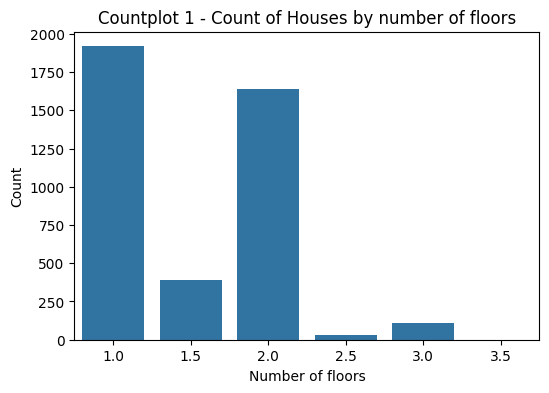

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df['floors'])
plt.xlabel("Number of floors")
plt.ylabel("Count")
plt.title("Countplot 1 - Count of Houses by number of floors")
plt.show()


2. Count of houses by number of bedrooms - The code below gives us the code to create a countplot. Through this we can see that there are a larger number of houses which have either 3 or 4 bedrooms. We can use this to compare the house price based on number of bedrooms in a later part of this project.

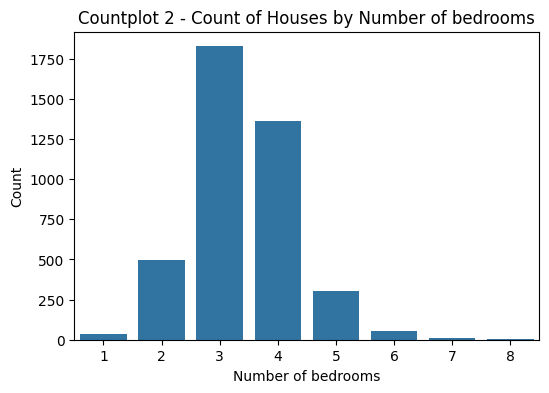

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['bedrooms'])
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")
plt.title("Countplot 2 - Count of Houses by Number of bedrooms")
plt.show()


3. Count of houses by view rating - The code below gives us the code to create a countplot. Through this we can see that there are a larger number of houses which have a view rating of 0. This can also be useful in the future to figure out the average change in prices among the different view ratings.

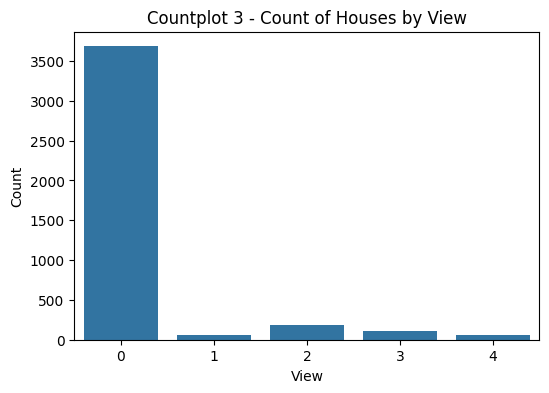

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['view'])
plt.xlabel("View")
plt.ylabel("Count")
plt.title("Countplot 3 - Count of Houses by View")
plt.show()

4. Count of houses by their condition - The code below gives us the code to create a countplot. Through this we can see that there are a larger number of houses which have either a condition rating of 3 or 4. A house with higher condition rating will have a higher price and we can graph this later in the project.


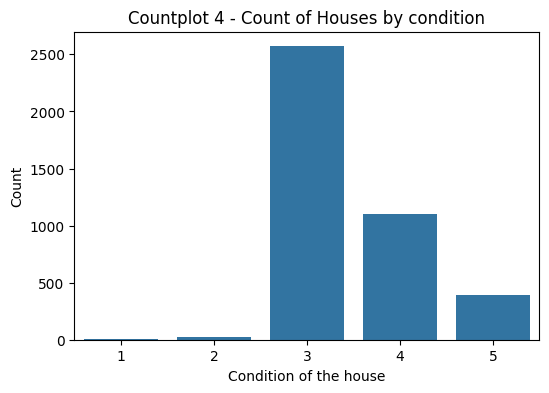

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['condition'])
plt.xlabel("Condition of the house")
plt.ylabel("Count")
plt.title("Countplot 4 - Count of Houses by condition")
plt.show()

####BARPLOTS


Below are 5 countplots of our dataset. These show us how prices vary with number of bedrooms, floors, bathrooms or the ratings on view and condition. Typically a higher number in any of these will cause a higher price on average and we can model these using the graphs below.

1. Barplot for price vs number of bedrooms - The code below gives us a barplot. We can use this to compare how price varies with the number of bedrooms. As we see that, a higher number of bedrooms increases the average price.

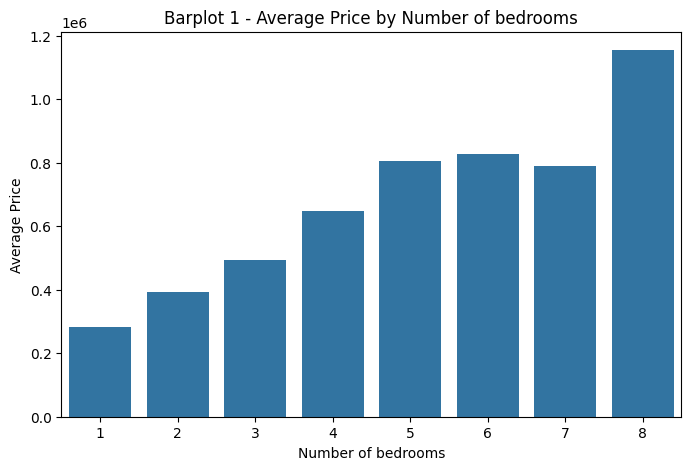

In [16]:
df_grouped = df.groupby('bedrooms')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel("Number of bedrooms")
plt.ylabel("Average Price")
plt.title("Barplot 1 - Average Price by Number of bedrooms")
plt.show()


2. Barplot for price vs number of bathrooms - The code below gives us a barplot. We can use this to compare how price varies with the number of bathrooms. As we see that, a higher number of bathrooms increases the average price.

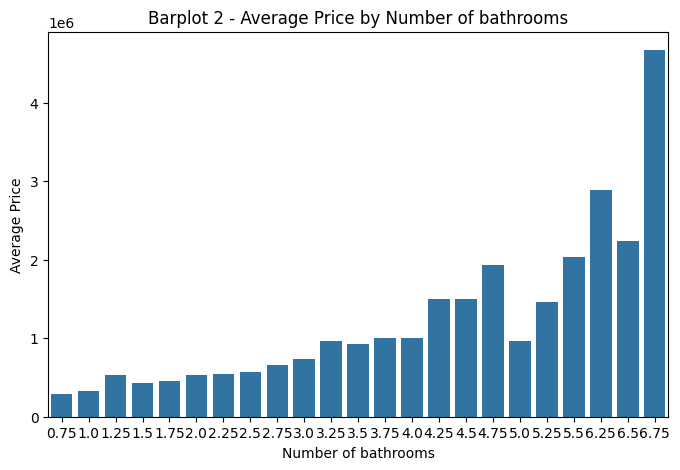

In [17]:
df_grouped = df.groupby('bathrooms')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel("Number of bathrooms")
plt.ylabel("Average Price")
plt.title("Barplot 2 - Average Price by Number of bathrooms")
plt.show()


3. Barplot for price vs view rating - The code below gives us a barplot. We can use this to compare how price varies with the view rating. As we see that, a higher view rating increases the average price.

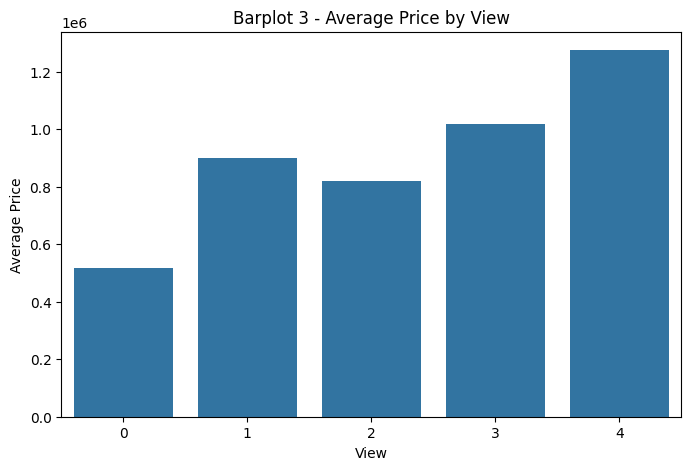

In [18]:
df_grouped = df.groupby('view')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel("View")
plt.ylabel("Average Price")
plt.title("Barplot 3 - Average Price by View")
plt.show()

4. Barplot for price vs number of floors - The code below gives us a barplot. We can use this to compare how price varies with the number of floors. As we see that, a house with around 2.5 floors has a higher price than almost all the other floors. This can be skewed data as well, because if we look at our Countplot 1, we see that there are very few houses with 2.5 or higher floors.

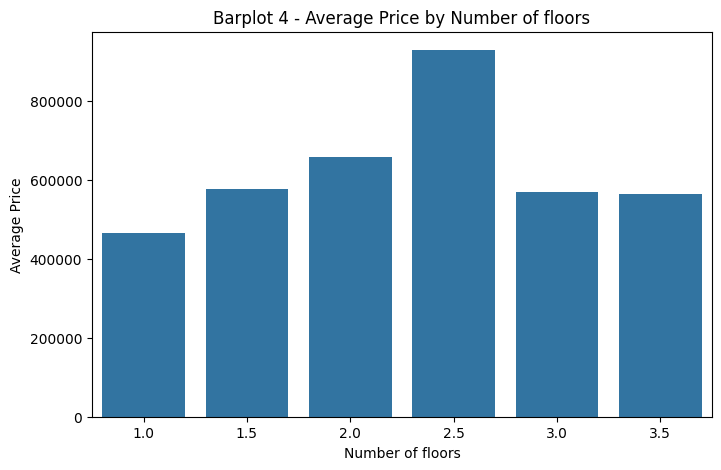

In [19]:
df_grouped = df.groupby('floors')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel("Number of floors")
plt.ylabel("Average Price")
plt.title("Barplot 4 - Average Price by Number of floors")
plt.show()

5. Barplot for price vs house condition - The code below gives us a barplot. We can use this to compare how price varies with the condition of our house. As we see that, a better coniditon of a house increases the price of the house.

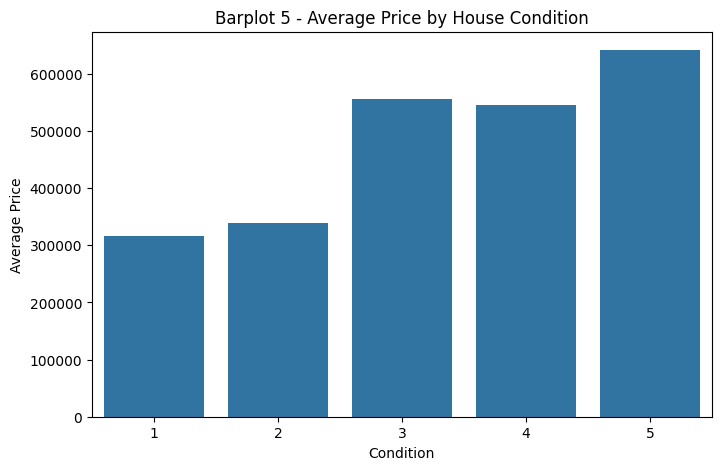

In [20]:
df_grouped = df.groupby('condition')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.xlabel("Condition")
plt.ylabel("Average Price")
plt.title("Barplot 5 - Average Price by House Condition")
plt.show()


####SCATTERPLOTS



Scatterplots are a good way to compare 2 variables, find a correlation among them (if any) and also compare them based on a third variable. The 4 scatterplots below show how the square footage of living area and basement size vary with price while also thinking about the overall condition of the house.

1. Living area in sqft vs price - The code below gives us a scatterplot comparing the sqft of living area and the price of the house. We see that the scatterplot is upward sloping which can suggest that as sqft of living area rises, the price also rises.

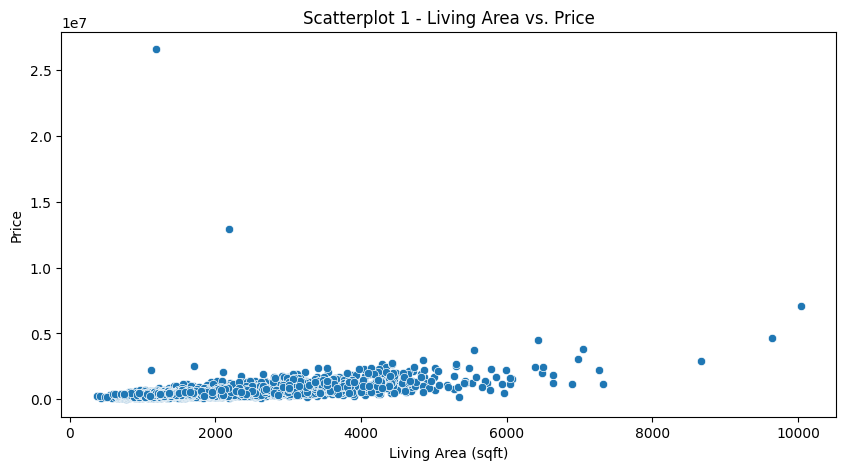

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatterplot 1 - Living Area vs. Price")
plt.show()


2. Basement area in sqft vs price - The code below gives us a scatterplot comparing the sqft of basement area and the price of the house. We see that the scatterplot is upward sloping which can suggest that as sqft of basement area rises, the price also rises.

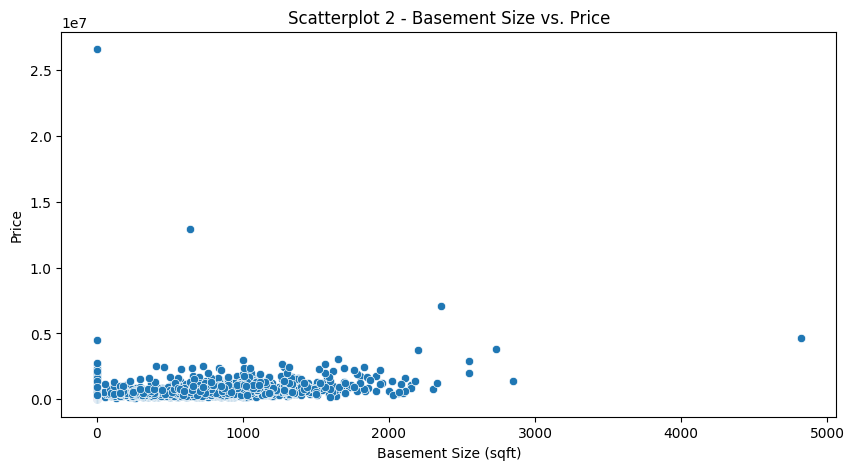

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sqft_basement'], y=df['price'])
plt.xlabel("Basement Size (sqft)")
plt.ylabel("Price")
plt.title("Scatterplot 2 - Basement Size vs. Price")
plt.show()


3. Living area in sqft vs price with respect to condition - The code below gives us a scatterplot comparing the sqft of living area and the price of the house while also considering the condition of the house. We see that higher the condition of the house and greater the sqft of living area, the price is also high.

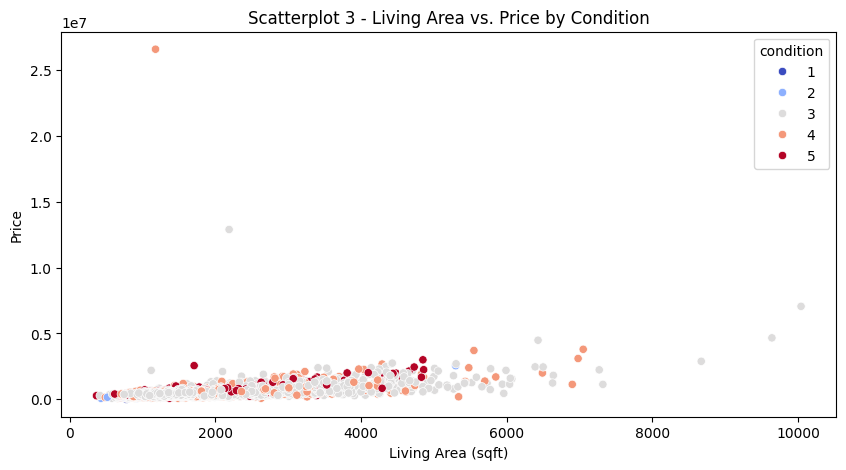

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sqft_living'], y=df['price'], hue=df['condition'], palette="coolwarm")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Scatterplot 3 - Living Area vs. Price by Condition")
plt.show()



4. Basement area in sqft vs price with respect to condition - The code below gives us a scatterplot comparing the sqft of basement area and the price of the house while also considering the condition of the house. We see that higher the condition of the house and greater the sqft of basement area, the price is also high.

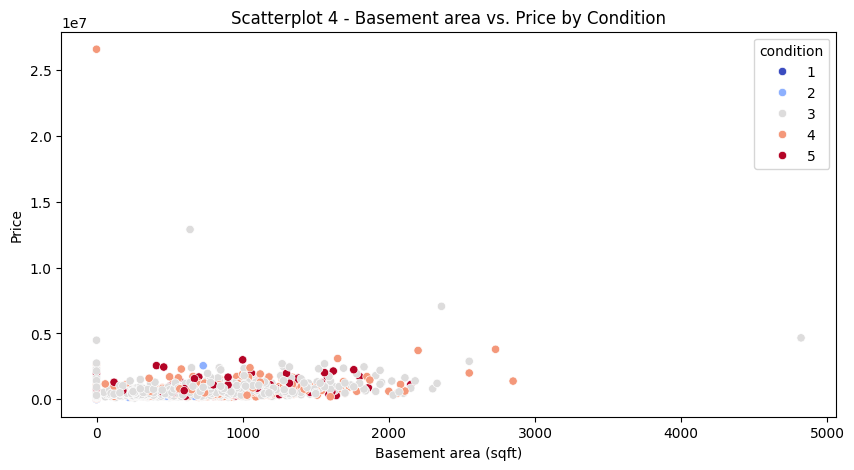

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sqft_basement'], y=df['price'], hue=df['condition'], palette="coolwarm")
plt.xlabel("Basement area (sqft)")
plt.ylabel("Price")
plt.title("Scatterplot 4 - Basement area vs. Price by Condition")
plt.show()

####CORRELATION HEATMAP

The code below gives us a correlation heatmap. Correlation heatmaps are very useful in seeing how the different variables may be correlated to one another and to what degree. Correlations closer to 1 and -1 mean that there is a strong relationship between these variables, whereas a correlation closer to 0 means that there is a very weak relationship between these variables. \\

In my correlation heatmap I use variables 'bedrooms', 'bathrooms', 'floors', 'view', 'condition' and 'price' mainly to see if there is any relationship between them. One relationship possibility could be that a higher view rating results in a higher price. This would be shown by a positive number closer to 1. \\

From the heatmap below we see that most correlations lie between 0.4 to 0 range which means that there are not many strong relationships in this dataset. This can be because the dataset only focuses on one state in The United States.However, we can still draw some conclusions from this heatmap. \\
1. bedrooms and bathrooms have a correlation of 0.54 which is high and it also makes sense as in an ideal house we would want almost the same number of bathrooms as bedrooms so more people can live comfortably in the house. \\
2. Another observation is that floors and bathrooms have a correlation of 0.50 which also makes sense because you want enough floors to fit all the bedrooms and bathrooms without reducing the overall sqft of living area.

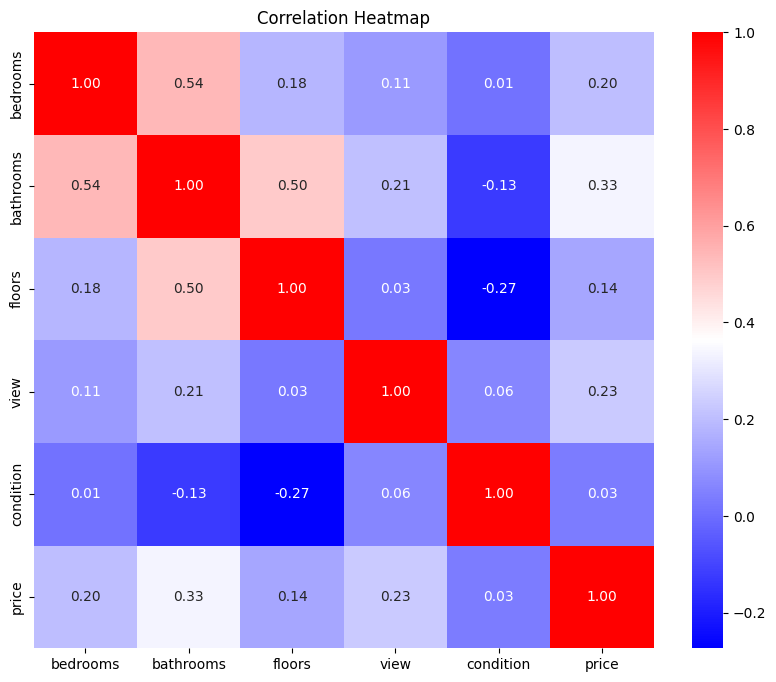

In [25]:
numeric_columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'price']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Part 3 - Expanding Your Investment Knowledge

Beyond this dataset, another dataset which can help us make better investment decisions regarding real estate is the 'USA Real Estate Dataset' available on Kaggle.com.








*  Why would this dataset be useful? \\
This dataset offers comprehensive real estate listings across the United States, organized by state and zip code. It includes detailed property information such as location, price, size, and other relevant attributes. Access to this data allows for a more specific analysis of various markets, enabling you to identify investment opportunities in specific regions or neighborhoods.

* How could it complement the data you are currently analyzing? \\
While the "USA House Prices" dataset provides historical sales data, integrating it with the "USA Real Estate Dataset" offers a broader perspective by including current listings and market availability. This combination allows you to:

1. Compare Historical and Current Data: Assess how current listings align with historical sales trends to identify appreciating or depreciating markets.

2. Market Supply Analysis: Evaluate the current inventory of properties to understand supply dynamics in targeted areas.

3. Price Trend Assessment: Analyze listing prices in conjunction with past sales to determine pricing strategies and potential investment returns.

The link to the kaggle dataset is - [Click here to access the dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset) \\
This link will take you to kaggle.com which has the dataset. Here, you can download the dataset in whichever format you would like or even just browse the data.


# THANK YOU!